In [1]:
import numpy as np
import pandas as pd
from data_process import *
import matplotlib.pyplot as plt
from datetime import datetime
import matplotlib.dates as mdates

In [2]:
match_level_df = pd.DataFrame(season_summary_df[['season', 'id', 'home_team', 'away_team', 'winner', 'description']])
match_level_df['stage'] = match_level_df['description'].apply(lambda x: x.split(',')[0].title())

In [3]:
alt = 1
def stage_score(row, team_code):
    global alt
    alt += 1
    if 'Eliminator' in row['stage'] or '3Rd Place Play-Off' in row['stage'] or 'Elimination Final' in row['stage']:
        return 7*((-1)**alt)
    if 'Match' == row['stage'].split(' ')[1]:
        return 6*((-1)**alt)
    if 'Qualifier 2' in row['stage'] or '1St Qualifying Final' in row['stage']:
        return 9*((-1)**alt)
    if 'Qualifier 1' in row['stage'] or '2Nd Qualifying Final' in row['stage']:
        return 8*((-1)**alt)
    if 'Semi-Final' in row['stage']:
        return 7.5*((-1)**alt)
    if 'Final' in row['stage']:
        if row['winner'] != team_code:
            return 9.5*((-1)**alt)
        return 10*((-1)**alt)
    return 4*((-1)**alt)

    

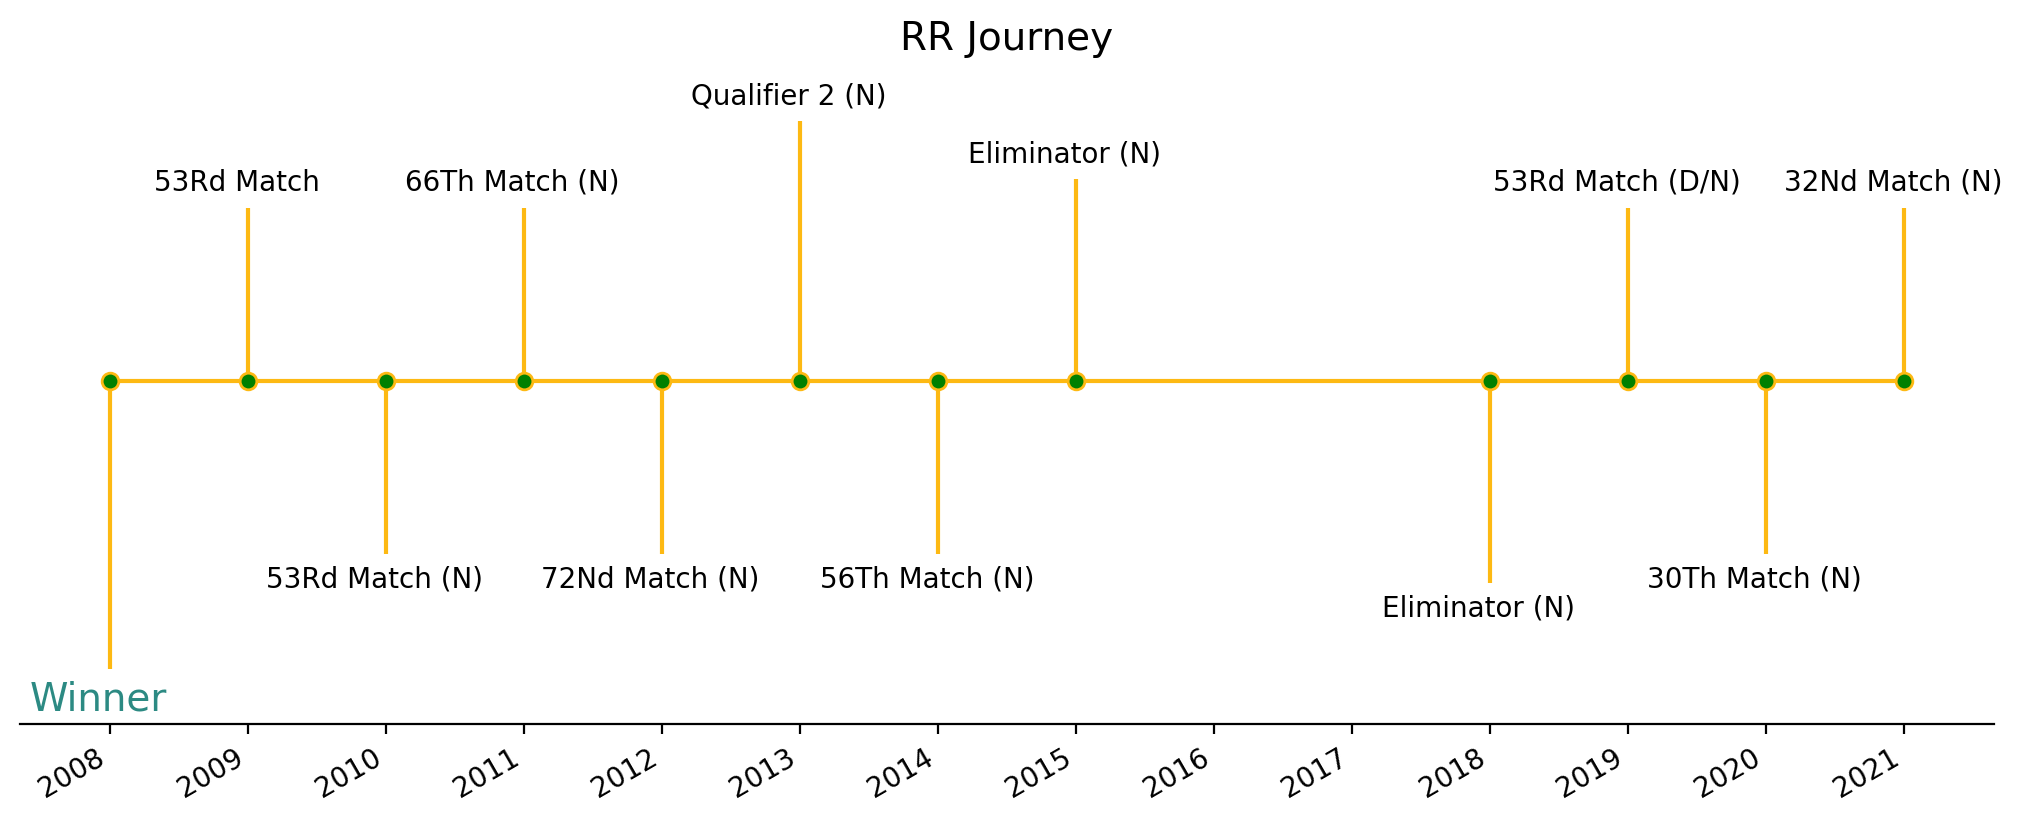

In [4]:
def team_journey_plot(team_code):
    team_df = pd.DataFrame(match_level_df[(match_level_df['home_team'] == team_code) | (match_level_df['away_team'] == team_code)])
    team_df = team_df.sort_values('id', ascending=False).drop_duplicates(['season'])
    team_df['stage_score'] = team_df.apply(lambda row: stage_score(row, team_code), axis=1)
    team_df['stage'] = team_df[['stage', 'stage_score']].apply(lambda x: x['stage'] if np.abs(x['stage_score']) !=10 else 'Winner', axis=1)
    names = team_df['stage']
    dates = team_df['season']
    dates = [datetime.strptime(str(x), '%Y') for x in dates]
    levels = team_df['stage_score']
    plt.rcParams['figure.dpi'] = 200
    fig, ax = plt.subplots(figsize=(10, 4), constrained_layout=True,facecolor='#ffffff')
    ax.set_title("{} Journey".format(team_code), fontsize=14)
    ax.vlines(dates, 0, levels, color='#fdb913')  # The vertical stems.
    ax.plot(dates, np.zeros_like(dates), "-o",
            color='#fdb913', markerfacecolor="g") 
    for d, l, r in zip(dates, levels, names):
        fontsize = 10    
        color = 'black'
        if r == 'Winner':
            fontsize=14
            color = '#2c8a83'
        ax.annotate(r, xy=(d, l),
                        xytext=(-4, np.sign(l)*4), textcoords="offset points",
                    horizontalalignment="center",
                    fontsize = fontsize,
                    color=color,
                    verticalalignment="bottom" if l > 0 else "top")
    ax.xaxis.set_major_locator(mdates.MonthLocator(interval=12))
    ax.xaxis.set_major_formatter(mdates.DateFormatter("%Y"))
    plt.setp(ax.get_xticklabels(), rotation=30, ha="right")

    # remove y axis and spines
    ax.yaxis.set_visible(False)
    ax.spines[["left", "top", "right"]].set_visible(False)

    ax.margins(y=0.1)
    plt.show()

team_journey_plot('RR')
